In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import indicators
from db import timscale_setup
from db import dbscrape
from backtesting import Backtest
#from backtesting.test import SMA
from backtesting import Strategy
from backtesting.lib import crossover
import ta


Loading BokehJS ...

In [ ]:
import PyAlgoTrade
import pandas_datareader
import pytz
import pyfolio as pf
from collections import OrderedDict

#quandl.ApiConfig.api_key = "1dkdmifTyDZVCKaXnKTD"


In [ ]:
print("Fetching Data")
data = timscale_setup.get_full_table("BANKNIFTY_F1")
data.describe()
data.head()

In [4]:
print("Fetching using dbscrape")
banknifty_table = "BANKNIFTY_F1"

startdate = "2020-02-02 09:30:00"
enddate = "2020-02-29 15:30:00"

#data = dbscrape.gettablerange(*(timscale_setup.get_config()), banknifty_table, startdate, enddate)
rawdata = dbscrape.expirymonth(*(timscale_setup.get_config()), banknifty_table, 4, 2020)
rawdata.head()


Fetching using dbscrape


,datetime,internalname,open,high,low,close,volume,unknown,expirydate,exchange
0,2020-03-27 09:16:00,BANKNIFTY APR FUT,20251.00,20849.9,20251.00,20740.00,56800,731520,2020-04-30 23:59:00,NSE
1,2020-03-27 09:17:00,BANKNIFTY APR FUT,20742.05,20900.0,20742.05,20806.10,47140,731520,2020-04-30 23:59:00,NSE
2,2020-03-27 09:18:00,BANKNIFTY APR FUT,20817.60,20819.7,20702.35,20734.10,41260,757480,2020-04-30 23:59:00,NSE
3,2020-03-27 09:19:00,BANKNIFTY APR FUT,20731.10,20739.7,20613.00,20625.15,24980,757480,2020-04-30 23:59:00,NSE
4,2020-03-27 09:20:00,BANKNIFTY APR FUT,20635.95,20726.5,20618.15,20634.60,21920,757480,2020-04-30 23:59:00,NSE


In [ ]:
data.tail()

In [5]:
rawdata.describe()

,open,high,low,close,volume,unknown
count,7914.000000,7914.000000,7914.000000,7914.000000,7914.000000,7.914000e+03
mean,19628.214114,19649.991521,19607.129069,19628.138331,16757.629644,1.188380e+06
std,937.283609,936.813407,938.567366,937.644220,13248.512327,2.580834e+05
min,17097.950000,17120.000000,17075.000000,17097.900000,1.000000,2.266400e+05
25%,19162.112500,19190.000000,19136.162500,19164.150000,8160.000000,1.021960e+06
50%,19589.950000,19610.000000,19570.000000,19588.875000,12680.000000,1.213660e+06
75%,20137.900000,20151.625000,20123.037500,20136.837500,20720.000000,1.396180e+06
max,21984.700000,21984.850000,21960.400000,21980.900000,130240.000000,1.648400e+06


In [7]:
datetime_index = pd.DatetimeIndex(pd.to_datetime(rawdata["datetime"]).values)
data_backtesting = rawdata.set_index(datetime_index)
#data_backtesting.drop(["datetime", "internalname", "unknown", "expirydate", "exchange"], axis=1, inplace=True)
data_backtesting.drop(["datetime", "internalname", "unknown", "expirydate", "exchange"], axis=1, inplace=True)
data_backtesting.rename(columns = {'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace = True)

data_backtesting.head()

,Open,High,Low,Close,Volume
2020-03-27 09:16:00,20251.00,20849.9,20251.00,20740.00,56800
2020-03-27 09:17:00,20742.05,20900.0,20742.05,20806.10,47140
2020-03-27 09:18:00,20817.60,20819.7,20702.35,20734.10,41260
2020-03-27 09:19:00,20731.10,20739.7,20613.00,20625.15,24980
2020-03-27 09:20:00,20635.95,20726.5,20618.15,20634.60,21920


In [8]:
ta.volatility.bollinger_hband(data_backtesting["Close"], 20, 2)

2020-03-27 09:16:00             NaN
2020-03-27 09:17:00             NaN
2020-03-27 09:18:00             NaN
2020-03-27 09:19:00             NaN
2020-03-27 09:20:00             NaN
                           ...     
2020-04-30 15:27:00    21558.079761
2020-04-30 15:28:00    21550.470075
2020-04-30 15:29:00    21542.249257
2020-04-30 15:30:00    21541.496941
2020-04-30 19:28:00    21541.281955
Name: hband, Length: 7914, dtype: float64

In [24]:
len(ta.volatility.bollinger_hband_indicator(data_backtesting["Close"], 20, 2))

8287

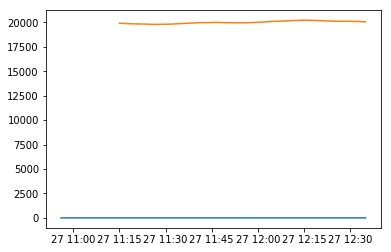

In [11]:
#plt.plot(data_backtesting.index[100:200], ta.volatility.bollinger_hband_indicator(data_backtesting["Close"][100:200], 20, 2))
#plt.plot(data_backtesting.index[100:200], ta.volatility.bollinger_lband(data_backtesting["Close"][100:200], 20, 2))
plt.plot(data_backtesting.index[100:200], ta.volatility.bollinger_mavg(data_backtesting["Close"][100:200], 20))
#plt.plot(data_backtesting.index[100:200], data_backtesting["Close"][100:200], 20))

#plt.plot(data_backtesting.index[100:200], ta.volume.volume_weighted_average_price(data_backtesting["High"][100:200],data_backtesting["Low"][100:200],data_backtesting["Close"][100:200], data_backtesting["Volume"][100:200], 14))
plt.show()

In [5]:

def SMA(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()

class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 13
    n2 = 32
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()



In [ ]:
class SmaCrossSignalTrail(SignalStrategy,
               TrailingStrategy):
    n1 = 10
    n2 = 25
    
    def init(self):
        # In init() and in next() it is important to call the
        # super method to properly initialize the parent classes
        super().init()
        
        # Precompute the two moving averages
        sma1 = self.I(SMA, self.data.Close, self.n1)
        sma2 = self.I(SMA, self.data.Close, self.n2)
        
        # Where sma1 crosses sma2 upwards. Diff gives us [-1,0, *1*]
        signal = (pd.Series(sma1) > sma2).astype(int).diff().fillna(0)
        signal = signal.replace(-1, 0)  # Upwards/long only
        
        # Use 95% of available liquidity (at the time) on each order.
        # (Leaving a value of 1. would instead buy a single share.)
        entry_size = signal * .95
                
        # Set order entry sizes using the method provided by 
        # `SignalStrategy`. See the docs.
        self.set_signal(entry_size=entry_size)
        
        # Set trailing stop-loss to 2x ATR using
        # the method provided by `TrailingStrategy`
        self.set_trailing_sl(2)


In [ ]:
from backtesting.test import GOOG

GOOG.head()

In [ ]:

bt = Backtest(GOOG, SmaCross, cash=10000, commission=.002)
stats = bt.run()
stats

In [6]:
bt_banknifty = Backtest(data_backtesting, SmaCross, cash=100000, commission=.002)
banknifty_stats = bt_banknifty.run()

print(banknifty_stats)

Start                     2020-01-01 09:16:00
End                       2020-01-30 19:10:00
Duration                     29 days 09:54:00
Exposure Time [%]                     99.0226
Equity Final [$]                      59647.8
Equity Peak [$]                        100000
Return [%]                           -40.3522
Buy & Hold Return [%]                 5.57261
Max. Drawdown [%]                    -40.3661
Avg. Drawdown [%]                    -40.3661
Max. Drawdown Duration       29 days 08:37:00
Avg. Drawdown Duration       29 days 08:37:00
# Trades                                  301
Win Rate [%]                          12.6246
Best Trade [%]                       0.864226
Worst Trade [%]                       -1.8407
Avg. Trade [%]                      -0.216793
Max. Trade Duration           2 days 18:39:00
Avg. Trade Duration           0 days 02:20:00
Profit Factor                        0.120486
Expectancy [%]                       0.275713
SQN                               

In [8]:
banknifty_stats["Return [%]"]

-40.352237700000146

In [ ]:

bt_banknifty.plot()

In [ ]:
bt.plot()

In [ ]:
%%time

stats = bt_banknifty.optimize(n1=range(8, 15, 1),
                    n2=range(20, 35, 1),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
print(stats)

In [ ]:
print(stats._strategy)
stats.tail()

In [ ]:
bt_banknifty.plot(plot_volume=False, plot_pl=False)

In [ ]:
bt_banknifty._strategy.__name__